In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [11]:
#Loading the Data
Data = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/dataset.pkl")
X_data = Data['data']
Y_data = Data['labels']
print(X_data.shape)
print(Y_data.shape)

(60000, 28, 28)
(60000,)


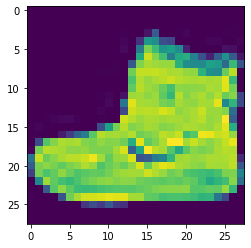

In [12]:
#Looking at some of the images we are working with - 
for i in range(1):
    img = X_data[i]
    plt.imshow(img)
    plt.show()

In [22]:
#Data Split

Training_size = 30000

X_flat = X_data.reshape(X_data.shape[0], 784).T

X_train = X_flat.T[0: Training_size].T
Y_train = Y_data[0:Training_size].reshape(1, Training_size)

X_test = X_flat.T[Training_size + 1:].T
Y_test = Y_data[Training_size + 1:]
Y_test = Y_test.reshape(1, Y_test.size)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


X_test_org = X_data[Training_size + 1:]
print(X_test_org.shape)

(784, 30000)
(784, 29999)
(1, 30000)
(1, 29999)
(29999, 28, 28)


In [14]:
#PSEUDO CODE

# First, we decide how many hidden layers & how many nodes we want in each layer
# I have used 1 hidden layer with 10 nodes in this implementation

# Then we start by randonmly initializing the required number of weights and biases for each layer

# And then we run Gradient Desent - 

# repeat {
#   forward propagation - to compute the outputs (through the network) for the current parameters
#   backword propagation - to compute the derievatives of the parameters at the current point in gradient desent
#   update parameters - use gradient desent to take a step towards optimal parameters
# }

In [15]:
class neural_net():

    def __init__(s):
        pass

    def train_model(s, X, Y, learning_rate, itr):
        s.X = X
        s.Y = Y
        s.lr = learning_rate
        
        s.n_pxls, s.n_samples = s.X.shape
        s.cost_values = []
        
        #Initialise parameters 
        s.initialize_parameters()
        
        #Gradient desent
        for i in range(itr):
            s.fwd_prop()
            s.bkwd_prop()
            s.update_params()

            cost = s.cost(s.A2, Y)
            s.cost_values.append(cost)
            s.train_acc = 0.0
            
            #Printing Training progress
            if(i % 100 == 0 and i>0):
                print('Iteration = ', i)
                preds = s.arg_max(s.A2)
                
                print("Cost = ", cost)
                s.train_acc = s.get_accuracy(preds, s.Y)
                print("Accuracy on Training Dataset = ", s.train_acc)
                #plt.plot(range(i+1), s.cost_values)
                '''
                print(s.dW1[0:2][0:2])
                print(s.db1[0:2][0:2])
                print(preds[0:20])
                print('\n')'''
        
        s.train_acc = s.get_accuracy(preds, s.Y)
        plt.plot(range(itr), s.cost_values)
                

    
    #Functions used for training - 

    def initialize_parameters(s):

        s.W1 = np.random.randn(10,784) * 0.01
        s.b1 = np.zeros((10, 1))
        s.W2 = np.random.randn(10, 10) * 0.01
        s.b2 = np.zeros((10, 1))

    def fwd_prop(s):
        
        # Z1 - Unactivated 1st (hidden) layer
        # A1 - Outputs of the 1st layer (from the ReLU/tanh Activation function)
        s.Z1 = np.dot(s.W1, s.X) + s.b1
        s.A1 = s._tanh(s.Z1)

        # Similarly Z2, and A2 for our 2nd layer
        s.Z2 = np.dot(s.W2, s.A1) + s.b2
        s.A2 = s._softmax(s.Z2)
        
        #The shapes of these are - (10, train_size)
        

    def bkwd_prop(s):
        
        #These are the derivatives of our cross entropy cost function with respect to the parameters
        #These expressions have been derieved using the chain rule...

        s.dZ2 = s.A2 - s._one_hot(s.Y)
        s.dW2 = (1/s.n_samples) * np.dot(s.dZ2, s.A1.T)
        s.db2 = (1/s.n_samples) * np.sum(s.dZ2, axis = 1, keepdims = True)

        s.dZ1 = np.dot(s.W2.T, s.dZ2) * s._d_tanh(s.Z1)
        s.dW1 = (1/s.n_samples) * np.dot(s.dZ1, s.X.T)
        s.db1 = (1/s.n_samples) * np.sum(s.dZ1, axis = 1, keepdims = True)           
    
    def update_params(s):
        # For each step of gradient desent, simulataneous updates of all params
        s.W1 = s.W1 - s.lr * s.dW1
        s.b1 = s.b1 - s.lr * s.db1

        s.W2 = s.W2 - s.lr * s.dW2
        s.b2 = s.b2 - s.lr * s.db2
        


    # Predictions & Accuracy Functions

    def predict(s, X_test, Y_test):

        #We compute the final funtions of our model based on the current/optimized parameters
        fZ1 = np.dot(s.W1, X_test) + s.b1
        fA1 = s._tanh(fZ1)
        fZ2 = np.dot(s.W2, fA1) + s.b2
        fA2 = s._softmax(fZ2)

        #Then pass the output through argmax to get the index of the most probable label
        preds = s.arg_max(fA2)
        print('Testing Accuracy = ', s.get_accuracy(preds, Y_test))
        return preds

    def arg_max(s, A2):
        return np.argmax(A2, 0)
    
    def get_accuracy(s, preds, Y):
        #Number of cases where prediction is correct, devided by total cases
        accuracy = np.sum(preds == Y)/Y.size
        return accuracy
    
    def cost(s, A2, Y) :
        #Cross entropy Cost wrt softmax
        return ( -1 / s.n_samples ) *  np.sum(s._one_hot(Y)*np.log(A2))

    #Some secondary Helper functions used above

    def _ReLU(s, Z):
        return np.maximum(Z, 0)

    def _d_ReLU(s, Z):
        #The derievative of ReLU(Z) is 0 when Z is -ve, and 1 whe Z is +ve
        return Z > 0

    def _softmax(s, Z):
        A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
        return A
    
    def _tanh(s, Z):
        return np.tanh(Z)       

    def _d_tanh(s, Z):
        d = 1 - np.square(s._tanh(Z))
        #d2 = 1 - np.power(np.tanh, 2)
        return d

    def _one_hot(s, Y):

        #We can't directly subtract Y as required in some of the calculations in back-propagation
        # That's why we use one hot encoding
        
        #First we initialize an empty array - 
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))

        # In each row (training example), we go to the coloumn as specified by the label in Y, and set it to 1
        one_hot_Y[np.arange(Y.size), Y] = 1

        eye = np.eye(10)[s.Y]
        
        #Lastly we take the transepose so that each coloumn is a training example (with '0's and a 1)
        return one_hot_Y.T

Iteration =  100
Cost =  1.9099963757466025
Accuracy on Training Dataset =  0.4822666666666667
Iteration =  200
Cost =  1.6373176549635375
Accuracy on Training Dataset =  0.5522666666666667
Iteration =  300
Cost =  1.461780884948385
Accuracy on Training Dataset =  0.5860333333333333
Iteration =  400
Cost =  1.3305869218326978
Accuracy on Training Dataset =  0.6229333333333333
Iteration =  500
Cost =  1.219174438877808
Accuracy on Training Dataset =  0.7238333333333333
Iteration =  600
Cost =  1.1583406707006
Accuracy on Training Dataset =  0.7070333333333333
Iteration =  700
Cost =  1.0614763915304726
Accuracy on Training Dataset =  0.749
Iteration =  800
Cost =  1.0073753931483886
Accuracy on Training Dataset =  0.7502666666666666
Iteration =  900
Cost =  0.9575187449328448
Accuracy on Training Dataset =  0.7560333333333333
Iteration =  1000
Cost =  0.9120858623735332
Accuracy on Training Dataset =  0.7700666666666667
Iteration =  1100
Cost =  0.8810552197470729
Accuracy on Training D

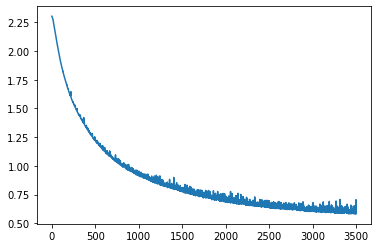

In [16]:
#Traning the model using the above class
clothes = neural_net()
training_acc = clothes.train_model(X_train, Y_train, learning_rate = 0.01, itr = 3500 )
p = clothes.predict(X_test, Y_test)
print('Training accuracy = ', clothes.train_acc * 100, '%')

Iteration =  100
Cost =  1.56439494141558
Accuracy on Training Dataset =  0.6331
Iteration =  200
Cost =  1.2257956028168662
Accuracy on Training Dataset =  0.6844
Iteration =  300
Cost =  1.0612968305794683
Accuracy on Training Dataset =  0.6945666666666667
Iteration =  400
Cost =  0.9798780429292154
Accuracy on Training Dataset =  0.7135333333333334
Iteration =  500
Cost =  0.8685573045214865
Accuracy on Training Dataset =  0.7477333333333334
Iteration =  600
Cost =  0.8138818711814494
Accuracy on Training Dataset =  0.7654333333333333
Iteration =  700
Cost =  0.7804145377667103
Accuracy on Training Dataset =  0.7697
Iteration =  800
Cost =  0.7296131911589914
Accuracy on Training Dataset =  0.7814333333333333
Iteration =  900
Cost =  0.6863924029447794
Accuracy on Training Dataset =  0.7939333333333334
Iteration =  1000
Cost =  0.6791610324306266
Accuracy on Training Dataset =  0.8038
Iteration =  1100
Cost =  0.650202149824717
Accuracy on Training Dataset =  0.8074
Iteration =  120

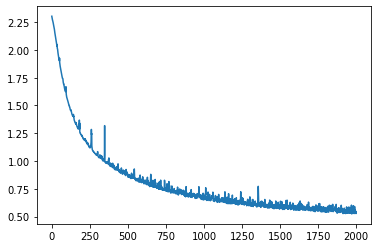

In [17]:
# I don't know why, but the cost tends to fluctuate a lot, and gradient desent is not consistent. 
# Even for a given learning rate and number of iterations, I may end up with different final cost values from gradient desent.
# This is probably because the weights are initiated randomly.

#That's why I have run the training multiple times to get the best results.

training_acc = clothes.train_model(X_train, Y_train, learning_rate = 0.02, itr = 2000 )
p = clothes.predict(X_test, Y_test)
print('Training accuracy = ', clothes.train_acc * 100, '%')

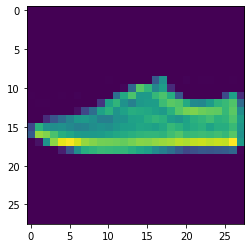

Actual Label =  7  -  Sneaker
Predicted Label =  7
Prediction =  Sneaker


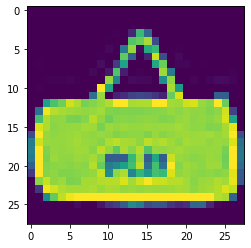

Actual Label =  8  -  Bag
Predicted Label =  8
Prediction =  Bag


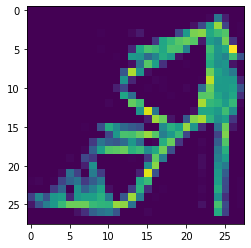

Actual Label =  5  -  Sandal
Predicted Label =  5
Prediction =  Sandal


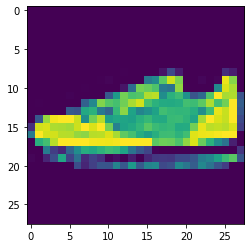

Actual Label =  7  -  Sneaker
Predicted Label =  7
Prediction =  Sneaker


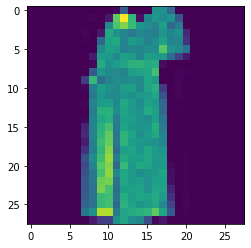

Actual Label =  3  -  Dress
Predicted Label =  3
Prediction =  Dress
Correct predictions =  5  out of  5
Inorrect predictions =  0  out of  5


In [21]:
# Looking at some of our predictions

label_names = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boots'
}
l = list(label_names.values())
t, f = 0, 0

#Looping over a small part of the test set predictions
for i in range(5, 10):
    img = X_test_org[i]
    plt.imshow(img)
    plt.show()

    a = int(Y_test.T[i])
    print('Actual Label = ', a, ' - ', l[a])
    pi = int(p[i])
    print('Predicted Label = ', p[i])
    print('Prediction = ', l[pi])
    

    if(p[i] == Y_test.T[i]):
        t+=1
    else:
        f+=1

print('Correct predictions = ', t, ' out of ', t+f)
print('Inorrect predictions = ', f, ' out of ', t+f)
    